In [1]:
# Imports
import numpy as np, pandas as pd, os, seaborn as sns, matplotlib.pyplot as plt


# Loading data from kaggle
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mushroom-classification/mushrooms.csv


In [2]:
# Defining a pandas dataframe 
df = pd.read_csv(r'/kaggle/input/mushroom-classification/mushrooms.csv')

In [3]:
# EDA;
df.shape # total rows --> 8124

(8124, 23)

In [4]:
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.info() # as we can see there are no NULL values at all

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
# Checking if any null values are present;
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
# checking the value counts of each column
val_dict = {}
for i in df.columns:
    val_dict[i] = df[[i]].value_counts()
    
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [10]:
for i in val_dict.keys():
    print(val_dict[i])
    print("---------------------")

class
e        4208
p        3916
dtype: int64
---------------------
cap-shape
x            3656
f            3152
k             828
b             452
s              32
c               4
dtype: int64
---------------------
cap-surface
y              3244
s              2556
f              2320
g                 4
dtype: int64
---------------------
cap-color
n            2284
g            1840
e            1500
y            1072
w            1040
b             168
p             144
c              44
r              16
u              16
dtype: int64
---------------------
bruises
f          4748
t          3376
dtype: int64
---------------------
odor
n       3528
f       2160
s        576
y        576
a        400
l        400
p        256
c        192
m         36
dtype: int64
---------------------
gill-attachment
f                  7914
a                   210
dtype: int64
---------------------
gill-spacing
c               6812
w               1312
dtype: int64
---------------------
gill-

In [11]:
# Dropping veil-type column
df.drop(['veil-type'], axis=1, inplace=True)

In [12]:
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m


In [13]:
# Finding Features using Cramers -- for correlation value b/t categorical attributes
# @Yury; Source: https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix
# @Bergsma, @Wicher; Source: Journal of the Korean Statistical Society 42 (2013): 323-328
from scipy import stats

def cramers(x, y):
    """
    This function calculated the correlation between 2 categorical attributes.
    """
    if len(x.value_counts()) == 1 or len(y.value_counts()) == 1: 
        pass
    else:
        confusion_matrix = pd.crosstab(x, y)
        chi_square = stats.chi2_contingency(confusion_matrix)[0]
        _sum = sum(confusion_matrix.sum())
        phi_square = chi_square/_sum
        ver, hor = confusion_matrix.shape
        phi_square_corr = max(0, phi_square - ((ver-1)*(hor-1))/(_sum-1))
        ver_corr = ver - ((ver-1)**2)/(_sum-1)
        hor_corr = hor - ((hor-1)**2)/(_sum-1)
        result = np.sqrt(phi_square_corr/min((hor_corr-1),(ver_corr-1)))
        return round(result,2)

In [14]:
corr_list = []
for i in df.columns[1:]:
    x = cramers(df[df.columns[0]], df[i])
    if x is not None and x > 0.5:
        corr_list.append(i)

corr_list

['odor',
 'gill-size',
 'gill-color',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'ring-type',
 'spore-print-color']

In [15]:
X = df[['odor',
 'gill-size',
 'gill-color',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'ring-type',
 'spore-print-color']]

y = df[['class']]

In [16]:
# Label Encoding on the columns --> # X -- ['odor', 'gill-color', 'spore-print-color']

from sklearn.preprocessing import LabelEncoder

for i in X:
    print(val_dict[i])
    print("---------------------")

odor
n       3528
f       2160
s        576
y        576
a        400
l        400
p        256
c        192
m         36
dtype: int64
---------------------
gill-size
b            5612
n            2512
dtype: int64
---------------------
gill-color
b             1728
p             1492
w             1202
n             1048
g              752
h              732
u              492
k              408
e               96
y               86
o               64
r               24
dtype: int64
---------------------
stalk-surface-above-ring
s                           5176
k                           2372
f                            552
y                             24
dtype: int64
---------------------
stalk-surface-below-ring
s                           4936
k                           2304
f                            600
y                            284
dtype: int64
---------------------
stalk-color-above-ring
w                         4464
p                         1872
g                  

In [17]:
label_encoder = LabelEncoder()
for i in X:
    xx = label_encoder.fit_transform(X[i])
    print(xx)

[6 0 3 ... 5 8 5]
[1 0 0 ... 0 1 0]
[ 4  4  5 ...  5  0 11]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 1 2]
[7 7 7 ... 5 7 5]
[7 7 7 ... 5 7 5]
[4 4 4 ... 4 0 4]
[2 3 3 ... 0 7 4]


In [18]:
# Applying the encoding
X = X[['odor',
 'gill-size',
 'gill-color',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'ring-type',
'spore-print-color']].apply(label_encoder.fit_transform)

X

,odor,gill-size,gill-color,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color
0,6,1,4,2,2,7,7,4,2
1,0,0,4,2,2,7,7,4,3
2,3,0,5,2,2,7,7,4,3
3,6,1,5,2,2,7,7,4,2
4,5,0,4,2,2,7,7,0,3
...,...,...,...,...,...,...,...,...,...
8119,5,0,11,2,2,5,5,4,0
8120,5,0,11,2,2,5,5,4,0
8121,5,0,5,2,2,5,5,4,0
8122,8,1,0,2,1,7,7,0,7


In [19]:
y = label_encoder.fit_transform(y)
print(y)
print(len(y))
np.unique(y) # as we can see it is binary classification

[1 0 0 ... 0 1 0]
8124


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0, 1])

In [20]:
# Normalizing the data
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
X = normalizer.fit_transform(X)
X

array([[0.44846106, 0.07474351, 0.29897404, ..., 0.52320456, 0.29897404,
        0.14948702],
       [0.        , 0.        , 0.32991444, ..., 0.57735027, 0.32991444,
        0.24743583],
       [0.23354968, 0.        , 0.38924947, ..., 0.54494926, 0.31139958,
        0.23354968],
       ...,
       [0.44901326, 0.        , 0.44901326, ..., 0.44901326, 0.3592106 ,
        0.        ],
       [0.54307539, 0.06788442, 0.        , ..., 0.47519096, 0.        ,
        0.47519096],
       [0.32547228, 0.        , 0.71603901, ..., 0.32547228, 0.26037782,
        0.26037782]])

In [21]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("---X---")
print(X_train.shape)
print(X_test.shape)
print("---Y---")
print(y_train.shape)
print(y_test.shape)

---X---
(6499, 9)
(1625, 9)
---Y---
(6499,)
(1625,)


In [22]:
# Modelling;
# Classification using Decision Tree;
from sklearn import tree # for plotting the decision tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [23]:
y_pred = dt.predict(X_test)
y_train_pred = dt.predict(X_train)

In [24]:
# Checking the metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report, f1_score
print("y_test",accuracy_score(y_test, y_pred))
print("y_train",accuracy_score(y_train, y_train_pred))

y_test 0.8781538461538462
y_train 0.896291737190337


--------------------------------------------------

In [25]:
X = df[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']]
y = df[['class']]
X = X.apply(label_encoder.fit_transform)
y = label_encoder.fit_transform(y)
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("---X---")
print(X_train.shape)
print(X_test.shape)
print("---Y---")
print(y_train.shape)
print(y_test.shape)
# Classification using Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_train_pred = dt.predict(X_train)

---X---
(6499, 21)
(1625, 21)
---Y---
(6499,)
(1625,)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[Text(125.55000000000001, 190.26, 'X[8] <= 0.5\nentropy = 0.999\nsamples = 6499\nvalue = [3365, 3134]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 1398\nvalue = [0, 1398]'),
 Text(167.4, 135.9, 'X[18] <= 1.5\nentropy = 0.925\nsamples = 5101\nvalue = [3365, 1736]'),
 Text(83.7, 81.53999999999999, 'X[10] <= 0.5\nentropy = 0.321\nsamples = 1334\nvalue = [78, 1256]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.0\nsamples = 78\nvalue = [78, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.0\nsamples = 1256\nvalue = [0, 1256]'),
 Text(251.10000000000002, 81.53999999999999, 'X[7] <= 0.5\nentropy = 0.55\nsamples = 3767\nvalue = [3287, 480]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.183\nsamples = 3200\nvalue = [3111, 89]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.894\nsamples = 567\nvalue = [176, 391]')]

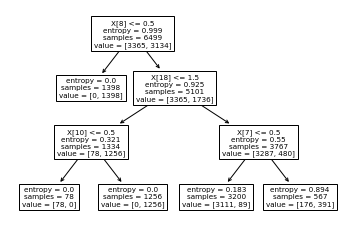

In [26]:
tree.plot_tree(dt.fit(X_train, y_train)) 

In [27]:
# Checking the metrics
print("y_test",accuracy_score(y_test, y_pred))
print("y_train",accuracy_score(y_train, y_train_pred))

y_test 0.9489230769230769
y_train 0.9592244960763194


In [28]:
confusion_matrix(y_test, y_pred)

array([[779,  64],
       [ 19, 763]])

In [29]:
f1_score(y_test, y_pred)

0.9484151646985705

In [30]:
roc_curve(y_test, y_pred)

(array([0.        , 0.07591934, 1.        ]),
 array([0.        , 0.97570332, 1.        ]),
 array([2, 1, 0]))

-------------------------

In [31]:
# Modelling using XGB
import xgboost as xgb

xgb = xgb.XGBClassifier(n_estimators=10, seed=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_train_pred = dt.predict(X_train)

[05:49:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [32]:
# Checking the metrics for XGB
print("y_test",accuracy_score(y_test, y_pred))
print("y_train",accuracy_score(y_train, y_train_pred))

y_test 1.0
y_train 0.9592244960763194
